In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# difusion of AHL
def difusion(AHL, D, dt, dx):
    new_AHL=[]
    for i in range(1, len(AHL)-1):
        new_AHL[i] = AHL[i] + D*dt/dx**2*(AHL[i+1] - 2*AHL[i] + AHL[i-1])-1
        if new_AHL[i]<0:
            new_AHL[i]=0
    return new_AHL

# cells secret AHL
def secretion(AHL, cell_state):
    for x,y,v in cell_state:
        x=int(x)
        y=int(y)
        AHL[x,y] =AHL[x,y]+v
    return AHL


In [3]:
# cell runs
def run(AHL, cell_state):
    # update cell state
    new_cell_state = []
    for x, y, v in cell_state:
        v = v - AHL[int(x),int(y)] + 1
        if v<0:
            v=0
        theta = random.random()*2*np.pi
        x += v*np.cos(theta)
        y += v*np.sin(theta)
        # check boundaries
        if x < 0:
            x = 0
            v = -v
        elif x >= size:
            x = size - 1
            v = -v
        if y < 0:
            y = 0
            v = -v
        elif y >= size:
            y = size - 1
            v = -v
        new_cell_state.append((x, y, v))
    cell_state = new_cell_state
    return cell_state

In [12]:
# Set up parameters
size = 1000  # size of the grid
cell_state=[]
# seed 100 cells in the middle
for i in range(10000):
    cell_state.append([size/2,size/2,0.1])
# concentration of AHL
AHL=np.zeros((size,size))


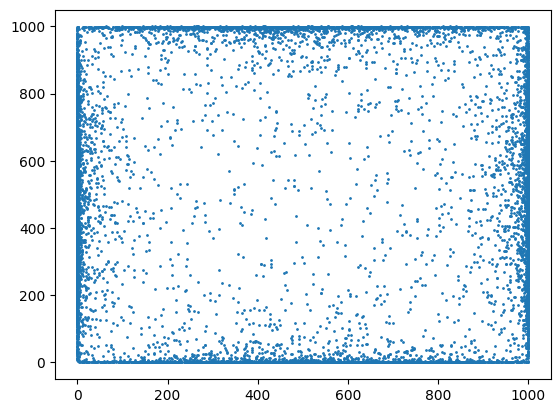

In [38]:
# cell run
for i in range(10):
    cell_state=run(AHL, cell_state)
    #for j in range(10):
        #0AHL=secretion(AHL, cell_state)
        #AHL=difusion(AHL, 1, 1, 1)

# plot cell state
x, y, v = zip(*cell_state)
plt.scatter(x, y, s=1)
plt.show()